# Understanding Suicide Rates
### A brief look at suicide rates
This dataset was found on [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), courtesy of [Rusty](https://www.kaggle.com/russellyates88).

This is also available via blog format on my [website](https://www.kubesh.co/mini-projects/suicide-rates).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('suicide_rates.csv')
df.drop(['country-year','HDI for year','gdp_per_capita ($)','generation'], axis = 1, inplace = True)

In [3]:
df['sex'] = df.sex.astype('category')
df['age'] = df.age.astype('category')
df['age'] = df['age'].cat.reorder_categories(['5-14 years', '15-24 years', '25-34 years', '35-54 years',\
                                '55-74 years', '75+ years'], ordered = True)

In [4]:
fig_size = (15,7)
title_size = 24
label_size = 14
tick_size = 12

The main areas of focus I have had on this dataset were the relationship of suicides per 100K and sex, age, country, and year. For the first one (suicide rate per 100K and sex), I started with just a basic pie chart to understand how the two compared globally.

In [5]:
sex_summary = df[['sex','suicides_no','population']].groupby('sex', as_index = False).sum()
sex_summary['suicides_per_100K'] = sex_summary.suicides_no / sex_summary.population * 100000

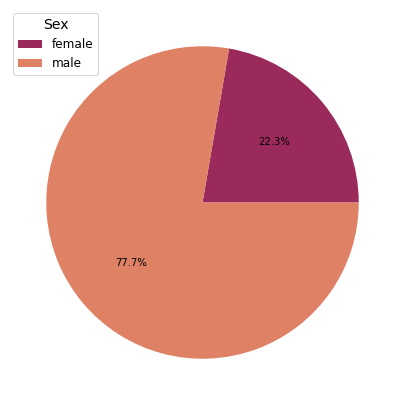

In [6]:
plt.figure(figsize = (7,8))
plt.pie(sex_summary.suicides_per_100K, autopct = '%0.1f%%', colors = ['#9a2a5c','#df8165'])
# plt.title('Global Suicides by Sex', fontsize = title_size)
plt.legend(sex_summary.sex, title = 'Sex', fontsize = tick_size)\
    .get_title().set_fontsize(label_size)

plt.savefig('global_suicides_by_sex.png')
plt.show()


The quick takeaway from this is that males are over three times more likely to commit suicide. This discovery was quite surprising to me, for I figured it would be far closer to equal with a slight skew to either side. From this, I compared the relationship between males and females throughout the timeframe of the dataset (1985-2016).

In [7]:
sex_year = df[['sex','year','suicides_no','population']]\
                .groupby(['sex','year'], as_index = False).sum()
sex_year['suicides_per_100K'] = sex_year.suicides_no / sex_year.population * 100000

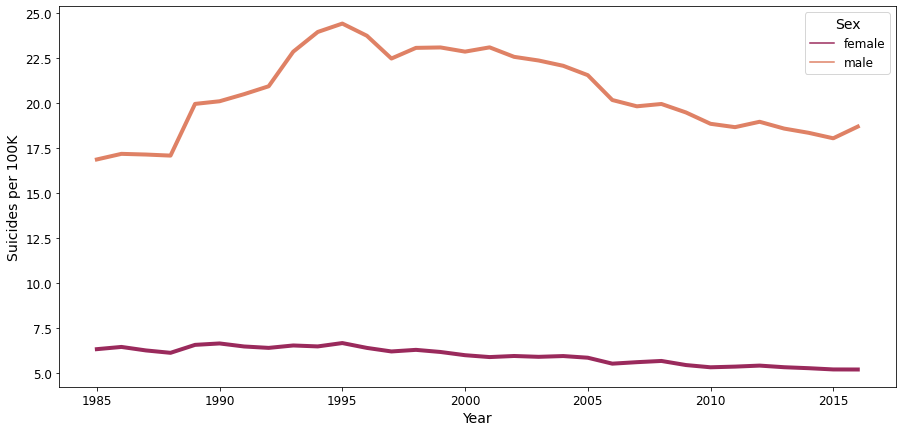

In [8]:
plt.figure(figsize = fig_size)
sns.lineplot(data = sex_year, y = 'suicides_per_100K', x = 'year', hue = 'sex', palette = ['#9a2a5c','#df8165'],\
            linewidth = 4)
# plt.title('Suicide Rates Per 100K vs Year', fontsize = title_size)
plt.xlabel('Year', fontsize = label_size)
plt.ylabel('Suicides per 100K', fontsize = label_size)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)
plt.legend(title = 'Sex', bbox_to_anchor=(1, 1), fontsize = tick_size).get_title().set_fontsize(label_size)
plt.savefig('global_suicides_by_sex_over_years.png')
plt.show()


The females experience a steady decline, whereas the males have a very rapid increase in the first ten years of the dataset then have a steady decrease for the 20 remaining years of the dataset. The suicide rate for males is also higher in the most recent years than at the beginning of the data set, which I find curious. This change makes me wonder what in 1995 changed the general trajectory of the male suicide rate.

Next, I began to take a look at the suicide rate across the different ages.

In [9]:
age_summary = df[['age','suicides_no','population']].groupby('age', as_index = False).sum()
age_summary['suicides_per_100K'] = age_summary.suicides_no / age_summary.population * 100000

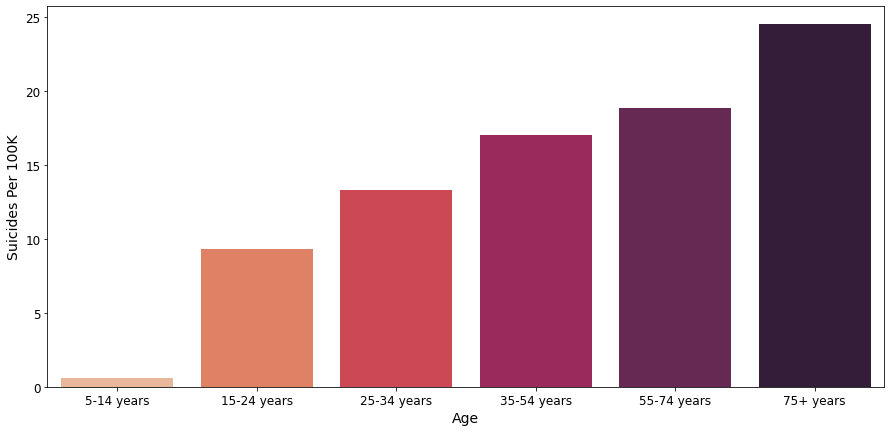

In [10]:
plt.figure(figsize = fig_size)
sns.barplot(data = age_summary, x = 'age', y = 'suicides_per_100K', palette = 'rocket_r')
# plt.title('Global Suicides by Age', fontsize = title_size)
plt.xlabel('Age',fontsize = label_size)
plt.ylabel('Suicides Per 100K', fontsize = label_size)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)

plt.savefig('global_suicides_by_age.png')
plt.show()

Similar to looking at sex, I was astonished by the resulting information. I would not have expected that the peak of suicide rates is among 75+ year old. I would have assumed that it would have been between 15-34 year-olds, or possibly 35-54 year-olds. Often when I hear about suicide, it has been with younger adults. This discovery was a prime example of the availability bias for me.

Like looking at sex, I took ages and compared them throughout the dataset's timeframe to find any noteworthy trends with the data.

In [11]:
age_year = df[['age','year','suicides_no','population']]\
                .groupby(['age','year'], as_index = False).sum()
age_year['suicides_per_100K'] = age_year.suicides_no / age_year.population * 100000

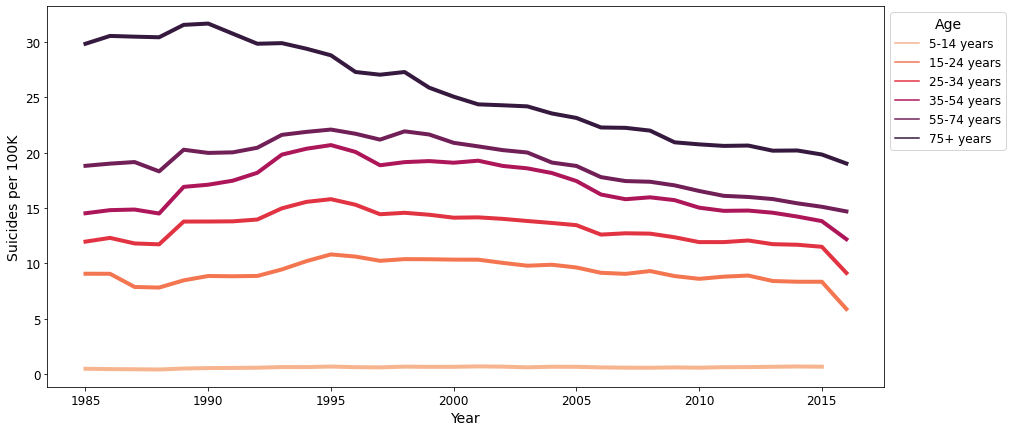

In [12]:
plt.figure(figsize = fig_size)
sns.lineplot(data = age_year, y = 'suicides_per_100K', x = 'year', hue = 'age', palette = 'rocket_r',\
            linewidth = 4)
# plt.title('Suicide Rates Per 100K vs Year', fontsize = title_size)
plt.xlabel('Year', fontsize = label_size)
plt.ylabel('Suicides per 100K', fontsize = label_size)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)
plt.legend(title = 'Age', bbox_to_anchor=(1, 1), fontsize = tick_size).get_title().set_fontsize(label_size)
plt.savefig('global_suicides_by_age_over_year.png')
plt.show()


This graph was rather interesting as well. All ages have a decline in the suicide rate, with 75+ experiencing the most steady and drastic decline. With what we saw in the graph comparing suicide rate by sex over time, we saw a peak in 1995 for men. With that knowledge and looking at this graph, we can see that this peak will be from the ages between 15-74, with the most prominent contributing group being 35-54 year-olds. This finding makes me wonder what this cohort experienced in 1995 changed the overall trajectory of male suicide rates.

Next, I began to look at countries and their specific suicide rate (with the below graph reflecting G7).

In [13]:
country_year = df[['country','year','suicides_no','population']]\
                .groupby(['country','year'], as_index = False).sum()
country_year['suicides_per_100K'] = country_year.suicides_no / country_year.population * 100000

In [14]:
def plot_countries(country_list):
    plt.figure(figsize = fig_size)
    sns.lineplot(data = country_year[country_year.country.isin(country_list)], \
                 y = 'suicides_per_100K', x = 'year', hue = 'country', palette = 'tab10', linewidth = 4)
#     plt.title('Suicide Rates Per 100K vs Year', fontsize = title_size)
    plt.xlabel('Year', fontsize = label_size)
    plt.ylabel('Suicides per 100K', fontsize = label_size)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.legend(title = 'Country', bbox_to_anchor=(1, 1), fontsize = tick_size).get_title().set_fontsize(label_size)
    plt.savefig('g7_suicides_by_country.png')
    plt.show()

In [15]:
G7 = ['Canada','France','Germany','Italy','Japan','United Kingdom','United States']

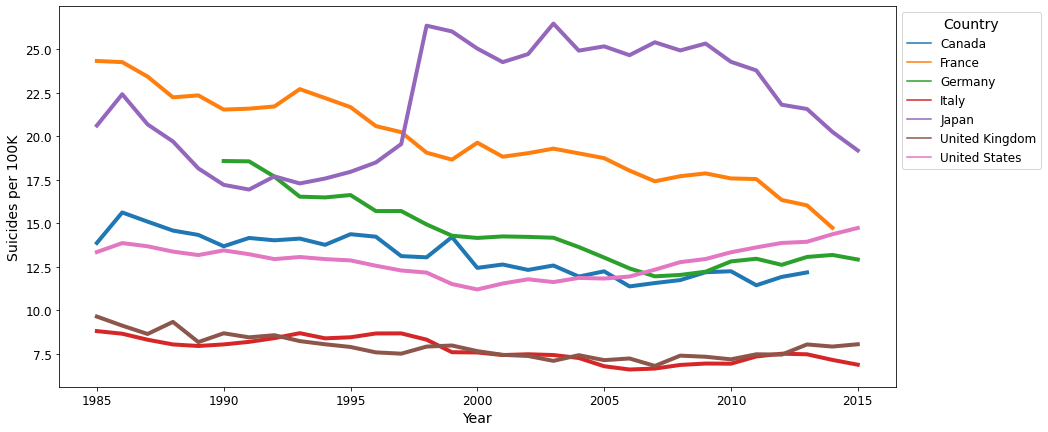

In [16]:
plot_countries(G7)


Here you can see that 5 of the 7 have a steady decline, with the United States and Japan being fascinating. In the beginning, Japan has a very rapid decline until 1991 where they begin to increase slowly. In 1998, Japan was the highest among G7 and fluctuated around that level for about 11 years until they started declining once again. The US is exciting as well. They have a prolonged decline until 2000, after which, they begin to increase and have been steadily increasing since.

This final graph looks at the global suicide rate to see how we as humans are performing.

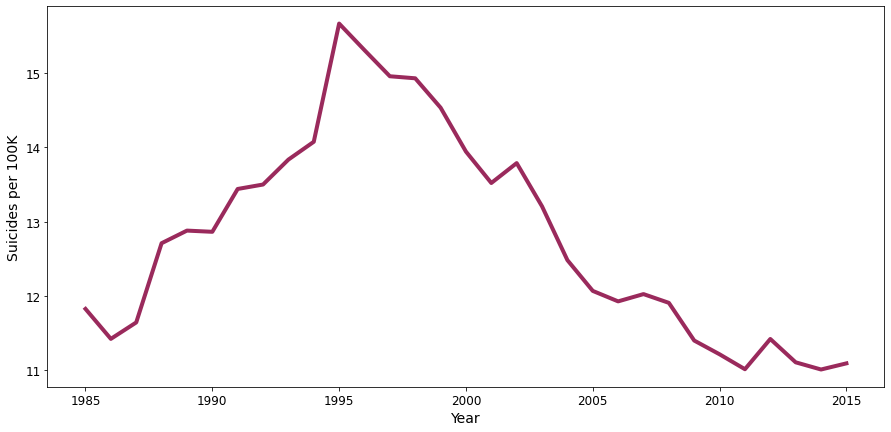

In [17]:
plt.figure(figsize = fig_size)
sns.lineplot(data = df[df.year != 2016], x = 'year', y = 'suicides/100k pop', color = '#9a2a5c', ci = None, linewidth = 4)
plt.xlabel('Year', fontsize = label_size)
plt.ylabel('Suicides per 100K', fontsize = label_size)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)

plt.savefig('global_suicides_by_year.png')
plt.show()

1995 was a significant year for the global suicide rate, as you may have thought when looking at the trajectory change for men in that year.

Overall, this was an exciting dataset to look at. This dataset also includes information relating to GDP and HDI (Human Development Index), which could be fun to explore.